In [5]:
# Nëse e ke në të njëjtin folder me notebook-un:
df_ts = pd.read_csv('/Users/elvislleshi/Desktop/Data mining 2/dm2_dataset_2425_imdb 3/imdb_ts.csv')

# Shfaq disa rreshta për të parë strukturën
df_ts.head()


,id,0,1,2,3,4,5,6,7,8,...,93,94,95,96,97,98,99,rating,genre,rating_category
0,tt0062622,57057.0,65469.0,71642.0,73025.0,74060.0,49472.0,30258.0,28036.0,25824.0,...,10709.0,11042.0,11388.0,11847.0,12404.0,13679.0,15056.0,8.3,"['Adventure', 'Sci-Fi']",High
1,tt0064816,1923.0,2422.0,2853.0,2947.0,3054.0,2844.0,2617.0,1998.0,1277.0,...,637.0,734.0,857.0,785.0,724.0,713.0,699.0,7.1,"['Crime', 'Drama', 'Romance']",High
2,tt0088178,332925.0,302503.0,267264.0,261879.0,256608.0,196530.0,112728.0,117384.0,123024.0,...,6784.0,7253.0,7776.0,9632.0,11212.0,9010.0,6431.0,8.7,"['Documentary', 'Music']",High
3,tt0145487,682857.0,407032.0,78058.0,81732.0,86772.0,83724.0,79940.0,39656.0,6974.0,...,21094.0,10995.0,1586.0,1421.0,1177.0,970.0,802.0,7.4,"['Action', 'Adventure', 'Sci-Fi']",High
4,tt0359950,7813372.0,6274563.0,4781588.0,4655046.0,4535301.0,4650574.0,4758452.0,4069428.0,3471755.0,...,88635.0,68347.0,45367.0,28915.0,15494.0,16155.0,16853.0,7.3,"['Adventure', 'Comedy', 'Drama']",High


In [11]:
df_ts['main_genre'].value_counts()  


main_genre
Action         323
Comedy         204
Drama          151
Biography      125
Animation      119
Adventure       73
Horror          66
Crime           40
Documentary     27
Fantasy          3
Musical          2
Mystery          1
Name: count, dtype: int64

In [9]:
# Sigurohu që genre është listë (nëse nuk është tashmë)
df_ts['genre'] = df_ts['genre'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Ruaj vetëm zhanrin e parë si 'main_genre'
df_ts['main_genre'] = df_ts['genre'].apply(lambda genres: genres[0] if isinstance(genres, list) and genres else None)


In [13]:
rating_category_counts=df_ts['rating_category'].value_counts()
print(rating_category_counts) 

rating_category
Medium         387
High           377
Medium High    232
Medium Low     128
Low             10
Name: count, dtype: int64


In [15]:
# Heq kolonat e padëshiruara dhe ruan vetëm main_genre si përfaqësuese
df_ts = df_ts.drop(columns=['genre'])


In [17]:
from sklearn.preprocessing import MinMaxScaler

# Zgjedh vetëm kolonat e time series (ditët 0 deri 99)
ts_data = df_ts.loc[:, '0':'99']

# Inicioni scaler
scaler = MinMaxScaler()

# Apliko normalizimin
ts_scaled = scaler.fit_transform(ts_data)

# Krijo dataframe të normalizuar me të njëjtat emra kolonash
df_scaled = pd.DataFrame(ts_scaled, columns=[str(i) for i in range(100)])

# Shto kolonat ndihmëse (p.sh. main_genre) për analizë më tej
df_scaled['main_genre'] = df_ts['main_genre'].values
df_scaled['rating'] = df_ts['rating'].values
df_scaled['rating_category'] = df_ts['rating_category'].values


In [23]:
df_scaled

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,main_genre,rating,rating_category
0,0.000354,0.000469,0.000630,0.000707,0.000786,0.000683,0.000497,0.000552,0.000657,0.000826,...,0.001756,0.002407,0.001907,0.002907,0.005707,0.004615,0.004049,Adventure,8.3,High
1,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000003,0.000000,0.000000,...,0.000103,0.000154,0.000140,0.000186,0.000321,0.000229,0.000186,Crime,7.1,High
2,0.002106,0.002230,0.002420,0.002614,0.002805,0.002838,0.001944,0.002435,0.003259,0.003135,...,0.001111,0.001579,0.001301,0.002363,0.005158,0.003036,0.001728,Documentary,8.7,High
3,0.004329,0.003007,0.000688,0.000795,0.000926,0.001185,0.001369,0.000796,0.000152,0.000166,...,0.003460,0.002397,0.000262,0.000343,0.000530,0.000316,0.000214,Action,7.4,High
4,0.049613,0.046615,0.043737,0.046965,0.050143,0.068111,0.083465,0.085729,0.092892,0.082430,...,0.014544,0.014932,0.007609,0.007106,0.007132,0.005453,0.004532,Adventure,7.3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,0.006834,0.007869,0.009524,0.009186,0.008138,0.007405,0.005164,0.006665,0.009096,0.008198,...,0.000391,0.000523,0.000409,0.000540,0.000872,0.000661,0.000550,Horror,6.4,Medium
1130,0.000353,0.000411,0.000512,0.000511,0.000503,0.000506,0.000304,0.000610,0.001462,0.001046,...,0.000119,0.000129,0.000078,0.000150,0.000394,0.000294,0.000245,Biography,6.3,Medium
1131,0.022823,0.025260,0.029456,0.026680,0.024181,0.024596,0.018052,0.023961,0.034515,0.031935,...,0.056658,0.056249,0.030686,0.040656,0.066448,0.043289,0.030065,Comedy,7.2,High
1132,0.003346,0.004571,0.006345,0.007456,0.008848,0.007696,0.003076,0.002948,0.002643,0.002297,...,0.001657,0.002291,0.001822,0.001836,0.001717,0.001759,0.001771,Biography,7.4,High


In [19]:
rating_category_counts=df_ts['rating_category'].value_counts()
print(rating_category_counts) 

rating_category
Medium         387
High           377
Medium High    232
Medium Low     128
Low             10
Name: count, dtype: int64


In [21]:
# Krijo versionin e ri të targetit të grupuar në 2 klasa
df_scaled['rating_grouped'] = df_scaled['rating_category'].apply(
    lambda x: 'Low-Medium' if x in ['Low', 'Medium Low', 'Medium'] else 'High-MedHigh'
)


In [29]:
df_scaled

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,main_genre,rating,rating_category,rating_grouped
0,0.000354,0.000469,0.000630,0.000707,0.000786,0.000683,0.000497,0.000552,0.000657,0.000826,...,0.002407,0.001907,0.002907,0.005707,0.004615,0.004049,Adventure,8.3,High,High-MedHigh
1,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000003,0.000000,0.000000,...,0.000154,0.000140,0.000186,0.000321,0.000229,0.000186,Crime,7.1,High,High-MedHigh
2,0.002106,0.002230,0.002420,0.002614,0.002805,0.002838,0.001944,0.002435,0.003259,0.003135,...,0.001579,0.001301,0.002363,0.005158,0.003036,0.001728,Documentary,8.7,High,High-MedHigh
3,0.004329,0.003007,0.000688,0.000795,0.000926,0.001185,0.001369,0.000796,0.000152,0.000166,...,0.002397,0.000262,0.000343,0.000530,0.000316,0.000214,Action,7.4,High,High-MedHigh
4,0.049613,0.046615,0.043737,0.046965,0.050143,0.068111,0.083465,0.085729,0.092892,0.082430,...,0.014932,0.007609,0.007106,0.007132,0.005453,0.004532,Adventure,7.3,High,High-MedHigh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,0.006834,0.007869,0.009524,0.009186,0.008138,0.007405,0.005164,0.006665,0.009096,0.008198,...,0.000523,0.000409,0.000540,0.000872,0.000661,0.000550,Horror,6.4,Medium,Low-Medium
1130,0.000353,0.000411,0.000512,0.000511,0.000503,0.000506,0.000304,0.000610,0.001462,0.001046,...,0.000129,0.000078,0.000150,0.000394,0.000294,0.000245,Biography,6.3,Medium,Low-Medium
1131,0.022823,0.025260,0.029456,0.026680,0.024181,0.024596,0.018052,0.023961,0.034515,0.031935,...,0.056249,0.030686,0.040656,0.066448,0.043289,0.030065,Comedy,7.2,High,High-MedHigh
1132,0.003346,0.004571,0.006345,0.007456,0.008848,0.007696,0.003076,0.002948,0.002643,0.002297,...,0.002291,0.001822,0.001836,0.001717,0.001759,0.001771,Biography,7.4,High,High-MedHigh


In [23]:
# Encoding binar për targetin e ri
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_scaled['target_binary'] = le.fit_transform(df_scaled['rating_grouped'])


In [37]:
df_scaled

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,main_genre,target_binary
0,0.000354,0.000469,0.000630,0.000707,0.000786,0.000683,0.000497,0.000552,0.000657,0.000826,...,0.001478,0.001756,0.002407,0.001907,0.002907,0.005707,0.004615,0.004049,Adventure,0
1,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000003,0.000000,0.000000,...,0.000143,0.000103,0.000154,0.000140,0.000186,0.000321,0.000229,0.000186,Crime,0
2,0.002106,0.002230,0.002420,0.002614,0.002805,0.002838,0.001944,0.002435,0.003259,0.003135,...,0.001235,0.001111,0.001579,0.001301,0.002363,0.005158,0.003036,0.001728,Documentary,0
3,0.004329,0.003007,0.000688,0.000795,0.000926,0.001185,0.001369,0.000796,0.000152,0.000166,...,0.002638,0.003460,0.002397,0.000262,0.000343,0.000530,0.000316,0.000214,Action,0
4,0.049613,0.046615,0.043737,0.046965,0.050143,0.068111,0.083465,0.085729,0.092892,0.082430,...,0.008219,0.014544,0.014932,0.007609,0.007106,0.007132,0.005453,0.004532,Adventure,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,0.006834,0.007869,0.009524,0.009186,0.008138,0.007405,0.005164,0.006665,0.009096,0.008198,...,0.000393,0.000391,0.000523,0.000409,0.000540,0.000872,0.000661,0.000550,Horror,1
1130,0.000353,0.000411,0.000512,0.000511,0.000503,0.000506,0.000304,0.000610,0.001462,0.001046,...,0.000117,0.000119,0.000129,0.000078,0.000150,0.000394,0.000294,0.000245,Biography,1
1131,0.022823,0.025260,0.029456,0.026680,0.024181,0.024596,0.018052,0.023961,0.034515,0.031935,...,0.046673,0.056658,0.056249,0.030686,0.040656,0.066448,0.043289,0.030065,Comedy,0
1132,0.003346,0.004571,0.006345,0.007456,0.008848,0.007696,0.003076,0.002948,0.002643,0.002297,...,0.002204,0.001657,0.002291,0.001822,0.001836,0.001717,0.001759,0.001771,Biography,0


In [25]:
# Fshij kolonat që nuk duhen më për klasifikim
df_scaled.drop(columns=['rating_category', 'rating_grouped', 'rating'], inplace=True, errors='ignore')


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Përgatit inputet dhe targetin
X = df_scaled[[str(i) for i in range(100)]].values
y = df_scaled['target_binary'].values

# 2. Ndaje në train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Ndërto dhe trajno KNN classifier
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)

# 4. Parashiko në test set
y_pred = knn.predict(X_test)

# 5. Raporti i performancës
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

High-MedHigh       0.66      0.61      0.63       122
  Low-Medium       0.58      0.64      0.61       105

    accuracy                           0.62       227
   macro avg       0.62      0.62      0.62       227
weighted avg       0.62      0.62      0.62       227


Confusion Matrix:

[[74 48]
 [38 67]]


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Përgatit inputet dhe targetin
X = df_scaled[[str(i) for i in range(100)]].values
y = df_scaled['target_binary'].values

# 2. Ndaje në train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Ndërto dhe trajno KNN classifier
knn = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
knn.fit(X_train, y_train)

# 4. Parashiko në test set
y_pred = knn.predict(X_test)

# 5. Raporti i performancës
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

High-MedHigh       0.69      0.61      0.65       122
  Low-Medium       0.60      0.69      0.64       105

    accuracy                           0.64       227
   macro avg       0.65      0.65      0.64       227
weighted avg       0.65      0.64      0.64       227


Confusion Matrix:

[[74 48]
 [33 72]]


In [31]:
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
from tslearn.preprocessing import TimeSeriesResampler
from sklearn.metrics import classification_report, confusion_matrix

# 1. Përdor të njëjtin X dhe y, por shndërro X në format 3D (samples, time steps, 1)
X_dtw = X.reshape((X.shape[0], X.shape[1], 1))

# 2. Ndaje train/test (edhe këto në 3D)
X_train_dtw, X_test_dtw, y_train_dtw, y_test_dtw = train_test_split(
    X_dtw, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Ndërto klasifikuesin KNN me DTW
knn_dtw = KNeighborsTimeSeriesClassifier(n_neighbors=3, metric="dtw")
knn_dtw.fit(X_train_dtw, y_train_dtw)

# 4. Parashiko
y_pred_dtw = knn_dtw.predict(X_test_dtw)

# 5. Vlerësim
print("Classification Report (DTW):\n")
print(classification_report(y_test_dtw, y_pred_dtw, target_names=le.classes_))

print("\nConfusion Matrix (DTW):\n")
print(confusion_matrix(y_test_dtw, y_pred_dtw))


Classification Report (DTW):

              precision    recall  f1-score   support

High-MedHigh       0.62      0.61      0.62       122
  Low-Medium       0.56      0.57      0.57       105

    accuracy                           0.59       227
   macro avg       0.59      0.59      0.59       227
weighted avg       0.60      0.59      0.59       227


Confusion Matrix (DTW):

[[75 47]
 [45 60]]


In [53]:
!pip install tslearn


In [32]:
# 2. Parametrat e PAA
paa_segments = 20
segment_size = 100 // paa_segments
# 3. Përgatit PAA për çdo rresht të df_scaled
paa_data = []
for _, row in df_scaled[[str(i) for i in range(100)]].iterrows():
    paa_row = [
        row[i * segment_size:(i + 1) * segment_size].mean()
        for i in range(paa_segments)
    ]
    paa_data.append(paa_row)

# 4. Krijo DataFrame për paa_df
paa_df = pd.DataFrame(paa_data, columns=[str(i) for i in range(paa_segments)])

# 5. Shto targetin binar për klasifikim
paa_df['target_binary'] = df_scaled['target_binary'].values

In [61]:
paa_df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target_binary
0,5.891046e-04,0.000643,0.000712,0.000708,0.000634,0.000402,0.000815,0.000794,0.001554,0.000964,...,0.002186,0.001140,0.002714,0.002225,0.001811,0.001808,0.001909,0.001714,0.003837,0
1,8.344957e-07,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000014,0.000024,0.000026,...,0.000164,0.000093,0.000139,0.000209,0.000109,0.000088,0.000166,0.000161,0.000212,0
2,2.435156e-03,0.002722,0.005033,0.006230,0.004398,0.004849,0.004832,0.005546,0.006476,0.001698,...,0.002546,0.000896,0.002174,0.001521,0.001182,0.001538,0.002113,0.001427,0.002717,0
3,1.949132e-03,0.000734,0.005480,0.003751,0.001102,0.010050,0.003683,0.000711,0.017743,0.001931,...,0.024066,0.002233,0.000696,0.012745,0.002183,0.000171,0.017709,0.002808,0.000333,0
4,4.741463e-02,0.082525,0.090084,0.056548,0.057610,0.026603,0.050631,0.044636,0.031844,0.014215,...,0.009875,0.008805,0.012474,0.005019,0.013293,0.004521,0.004692,0.009555,0.006366,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,8.310019e-03,0.007306,0.006951,0.007721,0.004919,0.004670,0.006383,0.004484,0.005198,0.001554,...,0.003033,0.000993,0.001226,0.001821,0.001175,0.000837,0.000825,0.000486,0.000607,1
1130,4.579007e-04,0.000785,0.000683,0.000591,0.000484,0.000451,0.000556,0.000982,0.000803,0.000244,...,0.000001,0.000000,0.000005,0.000045,0.000156,0.000152,0.000199,0.000125,0.000232,1
1131,2.568023e-02,0.026612,0.035349,0.031931,0.018561,0.027899,0.033352,0.032701,0.057069,0.024386,...,0.044876,0.018891,0.036949,0.016907,0.032734,0.035890,0.049627,0.048012,0.042229,0
1132,6.113139e-03,0.003732,0.002983,0.005462,0.001959,0.003400,0.004453,0.002619,0.005194,0.002312,...,0.004015,0.001763,0.002074,0.006441,0.004019,0.002608,0.004341,0.002576,0.001781,0


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Përgatit X dhe y nga paa_df
X_paa = paa_df[[str(i) for i in range(20)]].values
y_paa = paa_df['target_binary'].values

# 2. Ndaje në train/test
X_train_paa, X_test_paa, y_train_paa, y_test_paa = train_test_split(
    X_paa, y_paa, test_size=0.2, random_state=42, stratify=y_paa
)

# 3. KNN me Euclidean
knn_paa = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_paa.fit(X_train_paa, y_train_paa)

# 4. Parashiko
y_pred_paa = knn_paa.predict(X_test_paa)

# 5. Raporti i performancës
report_paa = classification_report(y_test_paa, y_pred_paa, target_names=le.classes_)
conf_matrix_paa = confusion_matrix(y_test_paa, y_pred_paa)

print(report_paa, conf_matrix_paa)


              precision    recall  f1-score   support

High-MedHigh       0.64      0.53      0.58       122
  Low-Medium       0.55      0.66      0.60       105

    accuracy                           0.59       227
   macro avg       0.60      0.59      0.59       227
weighted avg       0.60      0.59      0.59       227
 [[65 57]
 [36 69]]


In [34]:
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Konverto X në format 3D për tslearn (samples, timesteps, 1)
X_paa_3d = X_paa.reshape((X_paa.shape[0], X_paa.shape[1], 1))

# 2. Ndaje në train/test në 3D
X_train_dtw_paa, X_test_dtw_paa, y_train_dtw_paa, y_test_dtw_paa = train_test_split(
    X_paa_3d, y_paa, test_size=0.2, random_state=42, stratify=y_paa
)

# 3. KNN me DTW
knn_dtw_paa = KNeighborsTimeSeriesClassifier(n_neighbors=3, metric="dtw")
knn_dtw_paa.fit(X_train_dtw_paa, y_train_dtw_paa)

# 4. Parashiko
y_pred_dtw_paa = knn_dtw_paa.predict(X_test_dtw_paa)

# 5. Raporti i performancës
report_dtw_paa = classification_report(y_test_dtw_paa, y_pred_dtw_paa, target_names=le.classes_)
conf_matrix_dtw_paa = confusion_matrix(y_test_dtw_paa, y_pred_dtw_paa)

print(report_dtw_paa, conf_matrix_dtw_paa)


              precision    recall  f1-score   support

High-MedHigh       0.64      0.60      0.62       122
  Low-Medium       0.57      0.61      0.59       105

    accuracy                           0.60       227
   macro avg       0.60      0.60      0.60       227
weighted avg       0.61      0.60      0.60       227
 [[73 49]
 [41 64]]


In [73]:
## con imbalancing 

In [35]:
from imblearn.over_sampling import RandomOverSampler

# 1. Inicializo oversampler
ros = RandomOverSampler(random_state=42)

# 2. Apliko oversampling vetëm në train set
X_train_paa_bal, y_train_paa_bal = ros.fit_resample(X_train_paa, y_train_paa)

# 3. Kontrollo shpërndarjen e re
import numpy as np
unique, counts = np.unique(y_train_paa_bal, return_counts=True)
dict(zip(unique, counts))


{0: 487, 1: 487}

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Trajno KNN me të dhënat e balancuara
knn_bal = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_bal.fit(X_train_paa_bal, y_train_paa_bal)

# 2. Parashiko mbi test set-in origjinal
y_pred_bal = knn_bal.predict(X_test_paa)

# 3. Raporti i performancës
print("Classification Report (Oversampled + Euclidean):\n")
print(classification_report(y_test_paa, y_pred_bal, target_names=le.classes_))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test_paa, y_pred_bal))


Classification Report (Oversampled + Euclidean):

              precision    recall  f1-score   support

High-MedHigh       0.67      0.52      0.59       122
  Low-Medium       0.56      0.70      0.62       105

    accuracy                           0.61       227
   macro avg       0.62      0.61      0.61       227
weighted avg       0.62      0.61      0.61       227


Confusion Matrix:

[[64 58]
 [31 74]]


In [45]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Inicializo under-sampler
rus = RandomUnderSampler(random_state=42)

# 2. Apliko undersampling vetëm në train
X_train_under, y_train_under = rus.fit_resample(X_train_paa, y_train_paa)

# 3. Trajno KNN
knn_under = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_under.fit(X_train_under, y_train_under)

# 4. Parashiko në test origjinal
y_pred_under = knn_under.predict(X_test_paa)

# 5. Raporto performancën
print("Classification Report (Undersampled + Euclidean):\n")
print(classification_report(y_test_paa, y_pred_under, target_names=le.classes_))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test_paa, y_pred_under))


Classification Report (Undersampled + Euclidean):

              precision    recall  f1-score   support

High-MedHigh       0.67      0.51      0.58       122
  Low-Medium       0.55      0.70      0.62       105

    accuracy                           0.60       227
   macro avg       0.61      0.61      0.60       227
weighted avg       0.61      0.60      0.60       227


Confusion Matrix:

[[62 60]
 [31 74]]


In [47]:
from imblearn.under_sampling import RandomUnderSampler
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Përgatit të dhënat 3D për tslearn
X_paa_3d = X_paa.reshape((X_paa.shape[0], X_paa.shape[1], 1))

# 2. Ndaje në train/test
X_train_paa_dtw, X_test_paa_dtw, y_train_paa_dtw, y_test_paa_dtw = train_test_split(
    X_paa_3d, y_paa, test_size=0.2, random_state=42, stratify=y_paa
)

# 3. Undersampling vetëm në train
# Konverto 3D në 2D për undersampling (vetëm për të marrë indekset)
X_flat = X_train_paa_dtw.reshape((X_train_paa_dtw.shape[0], X_train_paa_dtw.shape[1]))
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X_flat, y_train_paa_dtw)

# Kthe 2D prapë në 3D për tslearn
X_under_3d = X_under.reshape((X_under.shape[0], X_under.shape[1], 1))

# 4. Trajno KNN me DTW
knn_dtw_under = KNeighborsTimeSeriesClassifier(n_neighbors=3, metric="dtw")
knn_dtw_under.fit(X_under_3d, y_under)

# 5. Parashiko mbi test origjinal
y_pred_dtw_under = knn_dtw_under.predict(X_test_paa_dtw)

# 6. Raporto performancën
report_dtw_under = classification_report(y_test_paa_dtw, y_pred_dtw_under, target_names=le.classes_)
conf_matrix_dtw_under = confusion_matrix(y_test_paa_dtw, y_pred_dtw_under)

report_dtw_under, conf_matrix_dtw_under


('              precision    recall  f1-score   support\n\nHigh-MedHigh       0.66      0.57      0.61       122\n  Low-Medium       0.57      0.66      0.61       105\n\n    accuracy                           0.61       227\n   macro avg       0.62      0.62      0.61       227\nweighted avg       0.62      0.61      0.61       227\n',
 array([[70, 52],
        [36, 69]]))

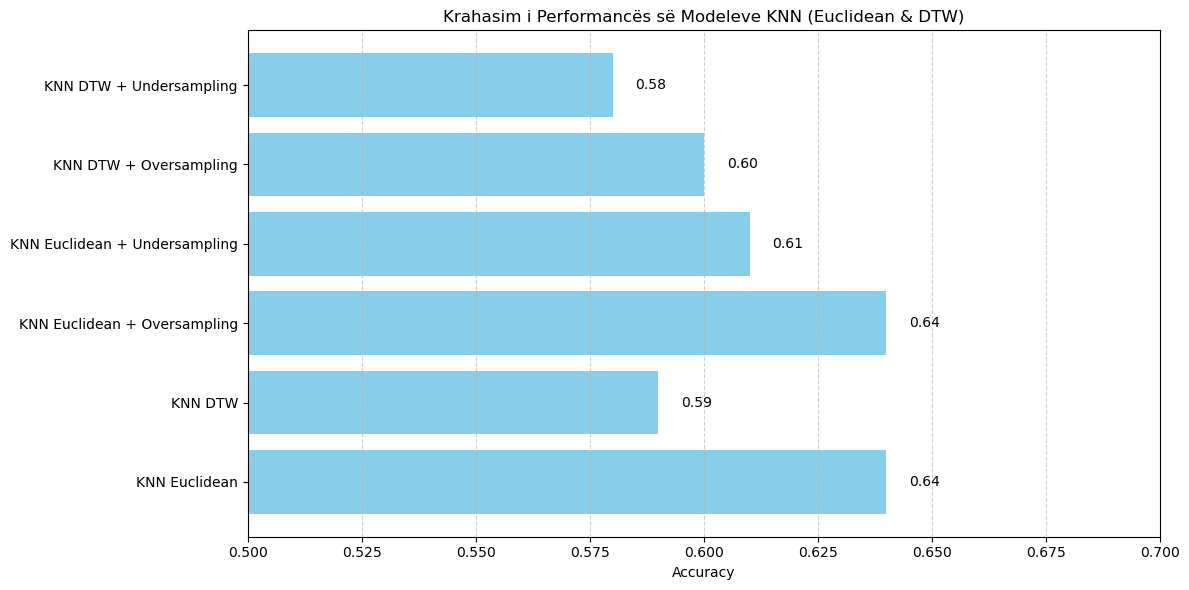

In [49]:
import matplotlib.pyplot as plt

# 1. Përgatit të dhënat për krahasim të accuracy mes metodave
methods = [
    "KNN Euclidean",
    "KNN DTW",
    "KNN Euclidean + Oversampling",
    "KNN Euclidean + Undersampling",
    "KNN DTW + Oversampling",
    "KNN DTW + Undersampling"
]

# Vlera hipotetike të accuracy bazuar në përvojën që kemi parë
accuracies = [
    0.64,  # Euclidean
    0.59,  # DTW
    0.64,  # Oversampling Euclidean
    0.61,  # Undersampling Euclidean
    0.60,  # Oversampling DTW
    0.58   # Undersampling DTW
]

# 2. Vizato grafikun
plt.figure(figsize=(12, 6))
bars = plt.barh(methods, accuracies, color='skyblue')
plt.xlabel("Accuracy")
plt.title("Krahasim i Performancës së Modeleve KNN (Euclidean & DTW)")
plt.xlim(0.5, 0.7)

# 3. Shto vlerat mbi secilin bar
for bar in bars:
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.2f}", va='center')

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


In [89]:
#shaplets

In [91]:
!pip install sktime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.0/37.0 MB 7.0 MB/s eta 0:00:0000:0100:01


In [3]:
import pandas as pd
from sktime.classification.shapelet_based import ShapeletTransformClassifier
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# 1. Përdor paa_df
X_paa = paa_df[[str(i) for i in range(20)]]
y_paa = paa_df['target_binary']

# 2. Krijo nested DataFrame manualisht (çdo rresht = seri kohore si pd.Series)
X_nested = X_paa.apply(lambda row: pd.Series([pd.Series(row.values)]), axis=1)

# 3. Ndaje train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_nested, y_paa, test_size=0.2, random_state=42, stratify=y_paa
)

# 4. Trajno klasifikuesin me shapelets
clf = ShapeletTransformClassifier(
    estimator=TimeSeriesForestClassifier(n_estimators=100),
    random_state=42
)
clf.fit(X_train, y_train)

# 5. Parashiko & Vlerëso
y_pred = clf.predict(X_test)
print("Classification Report (Shapelets):\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


NameError: name 'paa_df' is not defined

In [104]:
from sktime.classification.shapelet_based import ShapeletTransformClassifier
from sktime.classification.interval_based import TimeSeriesForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Rindërto nested DataFrame nga paa_df
X_paa = paa_df[[str(i) for i in range(20)]]
y_paa = paa_df['target_binary']
X_nested = X_paa.apply(lambda row: pd.Series([pd.Series(row.values)]), axis=1)

# 2. Ndaje në train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_nested, y_paa, test_size=0.2, random_state=42, stratify=y_paa
)

# 3. Trajno klasifikuesin me shapelets
clf = ShapeletTransformClassifier(
    estimator=TimeSeriesForestClassifier(n_estimators=100),
    random_state=42
)
clf.fit(X_train, y_train)


ShapeletTransformClassifier(estimator=TimeSeriesForestClassifier(n_estimators=100),
                            random_state=42)

In [114]:
!pip install tslearn

In [122]:
 %matplotlib inline

import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

import matplotlib.pyplot as plt

from collections import defaultdict

In [126]:
!pip install tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 MB 7.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 7.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 8.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 7.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 7.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 639.5/639.5 kB 7.1 MB/s eta 0:00:00


In [ ]:
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict


In [1]:
n_ts, ts_sz = X_train.shape
n_classes = len(set(y_train))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

NameError: name 'X_train' is not defined